Jumlah data: 2132
Kolom tersedia: ['review', 'label', 'clean', 'aspect']
                                              review  label  \
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...      1   
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...      0   
2  Saya kira awalnya minyak wangi Fress beneran, ...      1   
3  Baik, harum sekali, testyr kurang besar, murah...      2   
4  Produk sesuai dengan pesanan pengiriman tepat ...      2   

                                               clean   aspect  
0  q kira besar ternyata mini tapi cocok sic dg h...    aroma  
1  koyok ngengek yg dikirim minyak  mili iklan ny...  layanan  
2  saya kira awalnya minyak wangi fress beneran s...    aroma  
3  baik harum sekali testyr kurang besar murah re...    aroma  
4  produk sesuai dengan pesanan pengiriman tepat ...  kemasan  
Jumlah data latih: 1705
Jumlah data uji: 427

=== HASIL EVALUASI MODEL ===
Akurasi: 0.9578454332552693

=== Classification Report ===
              precision    rec

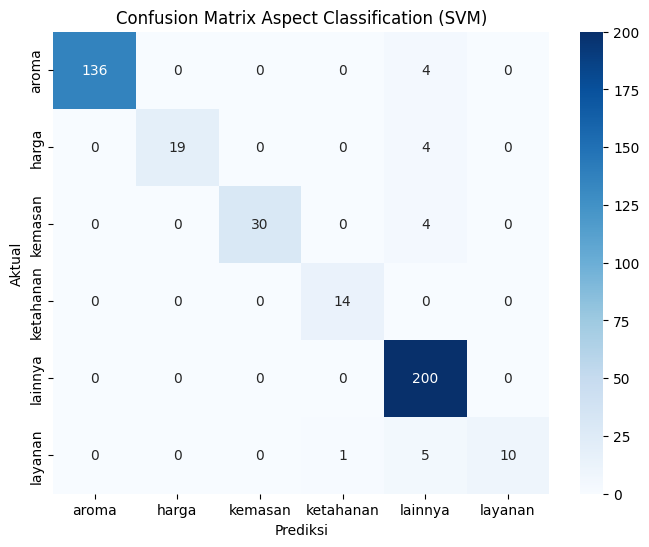


=== Contoh Prediksi Review Baru ===
Wanginya lembut dan segar banget → aroma
Pengiriman cepat dan penjual ramah → layanan
Botolnya kecil tapi desainnya lucu → kemasan
Harga cukup mahal untuk ukuran segitu → harga
Wanginya enak tapi cepat hilang → aroma

Model SVM dan TF-IDF berhasil disimpan.


In [ ]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 2. LOAD DATASET PARFUM
# ============================================================
file_path = "Dataset_Parfum_Labeled.xlsx"
df = pd.read_excel(file_path)

print("Jumlah data:", len(df))
print("Kolom tersedia:", list(df.columns))
print(df.head())

# ============================================================
# 3. CLEANING TEKS
# ============================================================
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review'].astype(str).apply(clean_text)

# ============================================================
# 4. SPLIT DATA (TRAIN - TEST)
# ============================================================
X = df['clean_review']
y = df['aspect']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

# ============================================================
# 5. TF-IDF VECTORIZATION
# ============================================================
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),  # unigram + bigram
    sublinear_tf=True
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ============================================================
# 6. TRAINING MODEL SVM
# ============================================================
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_vec, y_train)

# ============================================================
# 7. EVALUASI MODEL
# ============================================================
y_pred = svm_model.predict(X_test_vec)

print("\n=== HASIL EVALUASI MODEL ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Confusion Matrix ===")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Aspect Classification (SVM)")
plt.show()

# ============================================================
# 8. PREDIKSI REVIEW BARU
# ============================================================
def predict_aspect(text):
    text_clean = clean_text(text)
    vec = vectorizer.transform([text_clean])
    aspect_pred = svm_model.predict(vec)[0]
    return aspect_pred

print("\n=== Contoh Prediksi Review Baru ===")
new_reviews = [
    "Wanginya lembut dan segar banget",
    "Pengiriman cepat dan penjual ramah",
    "Botolnya kecil tapi desainnya lucu",
    "Harga cukup mahal untuk ukuran segitu",
    "Wanginya enak tapi cepat hilang"
]

for r in new_reviews:
    print(f"{r} → {predict_aspect(r)}")

# ============================================================
# 9. SIMPAN MODEL (OPSIONAL)
# ============================================================
import joblib

joblib.dump(svm_model, "svm_aspect_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\nModel SVM dan TF-IDF berhasil disimpan.")


In [3]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18812\572609146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['aspect'], order=df['aspect'].value_counts().index, palette="coolwarm")


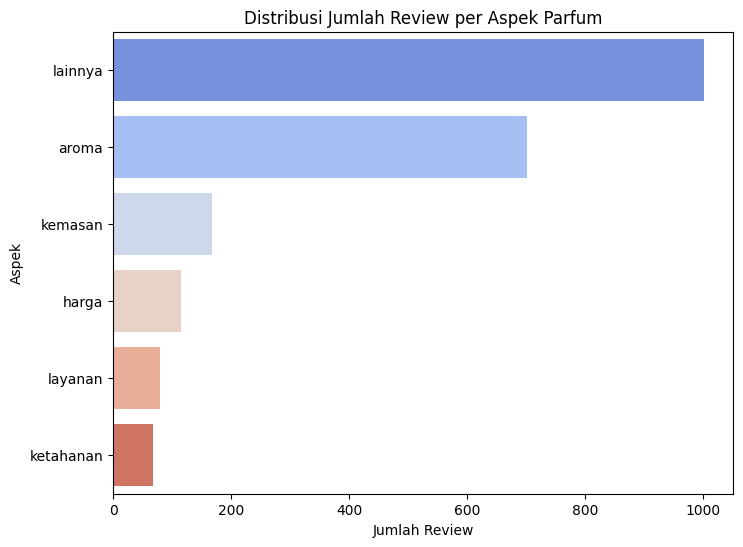

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18812\572609146.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df["f1-score"], palette="viridis")


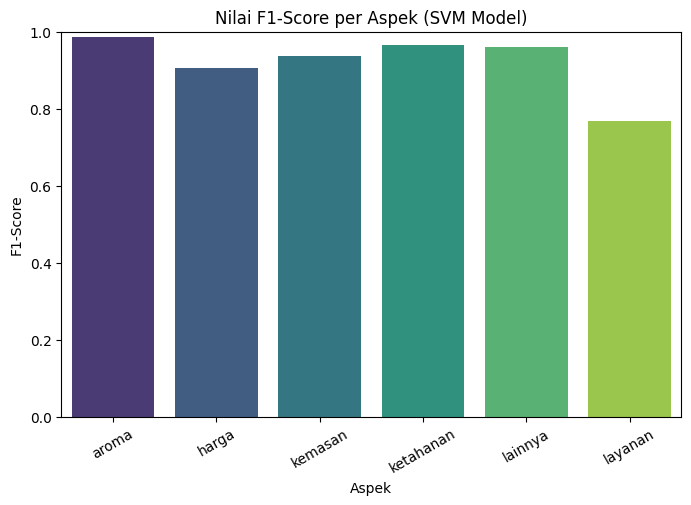

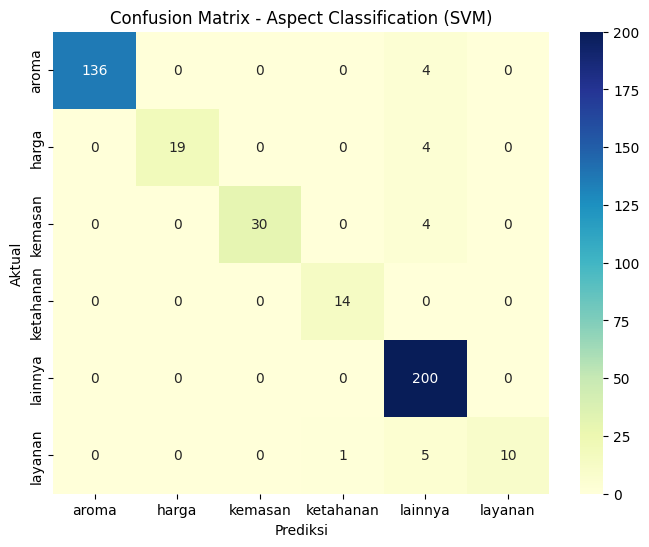

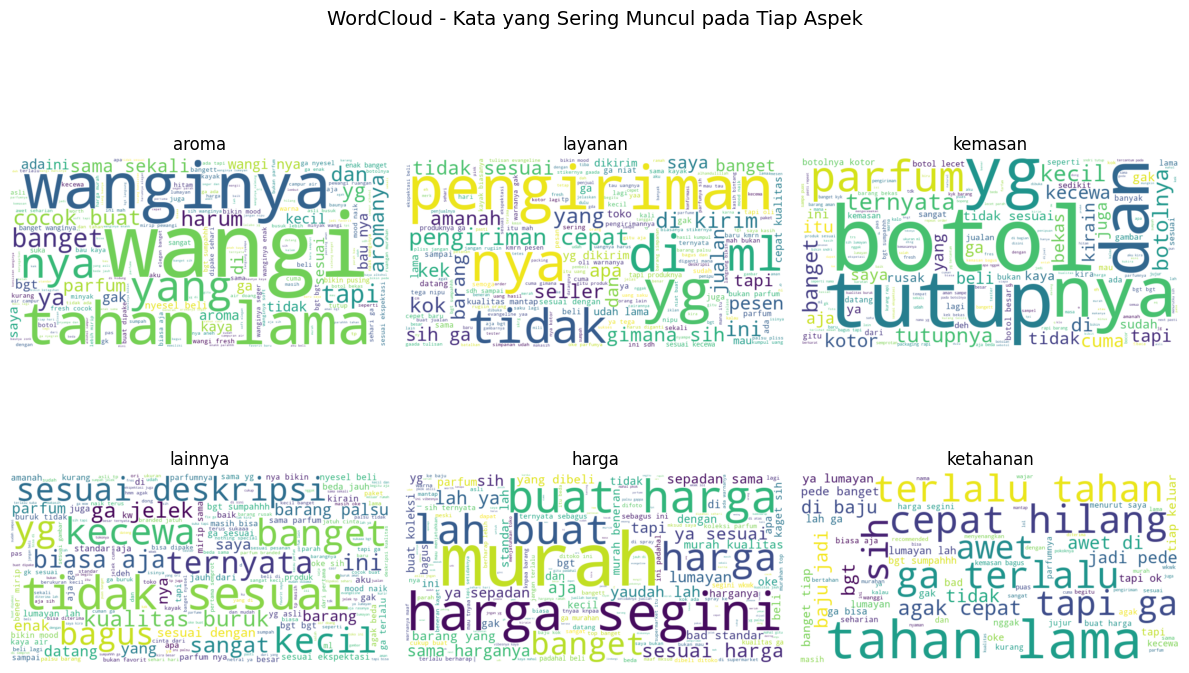

In [4]:
# ============================================================
# 10. VISUALISASI HASIL ASPECT CLASSIFICATION
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# ====== 10.1 Distribusi Jumlah Review per Aspek ======
plt.figure(figsize=(8,6))
sns.countplot(y=df['aspect'], order=df['aspect'].value_counts().index, palette="coolwarm")
plt.title("Distribusi Jumlah Review per Aspek Parfum")
plt.xlabel("Jumlah Review")
plt.ylabel("Aspek")
plt.show()

# ====== 10.2 Visualisasi Performa Model (Akurasi per Aspek) ======
from sklearn.metrics import classification_report
import pandas as pd

# Ambil nilai dari classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # hapus avg/accuracy baris bawah

plt.figure(figsize=(8,5))
sns.barplot(x=report_df.index, y=report_df["f1-score"], palette="viridis")
plt.title("Nilai F1-Score per Aspek (SVM Model)")
plt.ylabel("F1-Score")
plt.xlabel("Aspek")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

# ====== 10.3 Confusion Matrix (Heatmap) ======
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - Aspect Classification (SVM)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ====== 10.4 WordCloud per Aspek ======

plt.figure(figsize=(12,8))
for i, aspect in enumerate(df['aspect'].unique()):
    text = ' '.join(df[df['aspect']==aspect]['clean_review'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(aspect)
plt.suptitle("WordCloud - Kata yang Sering Muncul pada Tiap Aspek", fontsize=14)
plt.tight_layout()
plt.show()



In [10]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
import re
import joblib
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np

# ============================================================
# 2. LOAD DATASET PARFUM (SESUAI DENGAN CODE AA KAMU)
# ============================================================
file_path = "Dataset_Parfum_Labeled.xlsx"
df = pd.read_excel(file_path)

print("Jumlah data:", len(df))
print("Kolom tersedia:", list(df.columns))
print(df.head())

# ============================================================
# 3. CLEANING TEKS (SAMA SEPERTI SEBELUMNYA)
# ============================================================
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review'].astype(str).apply(clean_text)

# ============================================================
# 4. LOAD MODEL ASPEK (AA) — HASIL TRAINING SVM SEBELUMNYA
# ============================================================
svm_model = joblib.load("svm_aspect_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def predict_aspect(text):
    text_clean = clean_text(text)
    vec = vectorizer.transform([text_clean])
    aspect_pred = svm_model.predict(vec)[0]
    return aspect_pred

# ============================================================
# 5. LOAD MODEL SENTIMEN (SA) — INDOBERT
# ============================================================
MODEL_NAME = "indobenchmark/indobert-base-p1"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model.load_weights("result/tf_model.h5")

label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}

def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="tf",
        padding=True,
        truncation=True,
        max_length=128
    )
    outputs = model(inputs)
    probs = tf.nn.softmax(outputs.logits, axis=-1)
    label_id = tf.argmax(probs, axis=1).numpy()[0]
    confidence = float(tf.reduce_max(probs).numpy())
    return label_map[label_id], confidence

# ============================================================
# 6. FUNGSI UTAMA: GABUNGKAN HASIL ASPEK + SENTIMEN
# ============================================================
def analyze_review(text):
    aspect = predict_aspect(text)
    sentiment, confidence = predict_sentiment(text)
    return {
        "aspect": aspect,
        "sentiment": sentiment,
        "confidence": round(confidence, 3)
    }

# ============================================================
# 7. TESTING DENGAN BEBERAPA REVIEW
# ============================================================
if __name__ == "__main__":
    print("=== Aspect + Sentiment Analysis Parfum ===\n")

    test_reviews = [
        "Wanginya lembut dan segar banget",
        "Pengiriman cepat dan penjual ramah",
        "Botolnya kecil tapi desainnya lucu",
        "Harga cukup mahal untuk ukuran segitu",
        "Wanginya enak tapi cepat hilang"
    ]

    for review in test_reviews:
        result = analyze_review(review)
        print(f"Review: {review}")
        print(f"→ Aspek: {result['aspect']} | Sentimen: {result['sentiment']} (Confidence: {result['confidence']})\n")


AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

In [8]:
import numpy as np, tensorflow as tf
print(np.__version__)
print(tf.__version__)


AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.